# CV vs LB

In [22]:
import glob
import os.path
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

SCRIPT_PATH = os.path.join('..', 'scripts')
if SCRIPT_PATH not in sys.path:
    sys.path.append(SCRIPT_PATH)

from features import CATEGORICAL_FEATURES, VECTOR_FEATURES

pd.options.display.max_rows = 200
sns.set(font='Yu Gothic')

In [32]:
metric_dfs = []
for filepath in glob.glob(os.path.join('*', 'metrics.csv')):
    metric_df = pd.read_csv(filepath)
    metric_df = metric_df.rename(columns={'Unnamed: 0': 'statistic'}).reset_index(drop=True)
    metric_df['expNo'] = filepath[:3]
    metric_dfs.append(metric_df)
metrics = pd.concat(metric_dfs).dropna()
metrics

,statistic,train,valid,expNo
0,count,5.000000,5.000000,009
1,mean,0.261876,0.146291,009
2,std,0.004269,0.004896,009
3,min,0.255257,0.140236,009
4,25%,0.261117,0.141712,009
...,...,...,...,...
0,count,0.000000,0.000000,095
0,count,0.000000,0.000000,096
0,count,0.000000,0.000000,097
0,count,0.000000,0.000000,098


In [29]:
metric_df

,statistic,train,valid,expNo
0,count,0.0,0.0,099
1,mean,NaN,NaN,099
2,std,NaN,NaN,099
3,min,NaN,NaN,099
4,25%,NaN,NaN,099
5,50%,NaN,NaN,099
6,75%,NaN,NaN,099
7,max,NaN,NaN,099


In [23]:
submissions = pd.read_csv('submissions.csv')
subs = pd.DataFrame()

y_labels = list(range(8))
y_rate = pd.DataFrame({'y': y_labels})
y_nunique_values = []
sub_paths = []
for sub_path in glob.glob(os.path.join('*', '*_submission.csv')):
    sub = pd.read_csv(sub_path)
    y_nunique_values.append(sub.y.nunique())
    sub_paths.append(os.path.basename(sub_path))
    y_rate_ = sub.y.value_counts(normalize=True).reset_index().rename(columns={'index': 'y', 'y': os.path.basename(sub_path)})
    y_rate = pd.merge(y_rate, y_rate_, how='left')
    
    if 'id' not in subs:
        subs = sub.copy()
        subs.rename(columns={'y': os.path.basename(sub_path)}, inplace=True)
    else:
        subs = pd.merge(subs, sub.rename(columns={'y': os.path.basename(sub_path)}))

y_rate.fillna(0, inplace=True)
y_rate = y_rate.T.reset_index().rename(columns={'index': 'filename'}).query("filename != 'y'")
submissions = pd.merge(submissions, y_rate, how='left')

y_nunique = pd.DataFrame({'filename': sub_paths, 'numUniqueY': y_nunique_values})
submissions = pd.merge(submissions, y_nunique, how='left')

submissions['expNo'] = submissions.filename.apply(lambda x: x[:3])
submissions.sort_values('expNo', inplace=True)
submissions.reset_index(inplace=True)

submissions

,index,filename,cv,train,valid,LB,Note,0,1,2,3,4,5,6,7,numUniqueY,expNo
0,0,002_submission.csv,Stratified-Kfold(K=5),0.216635,0.132093,0.13110,ロジスティック回帰。class_weight=`balanced`.とりあえず作った。,0.168806,0.304307,0.097078,0.132010,0.111542,0.112666,0.006093,0.067499,8,002
1,1,003_submission.csv,Stratified-Kfold(K=5),0.177389,0.146417,0.12748,ロジスティック回帰。とりあえず作った。,0.583885,0.317972,0.067114,0.030584,0.000444,0.000000,0.000000,0.000000,5,003
2,2,004_submission.csv,Stratified-Kfold(K=5),0.237700,0.119829,0.12597,KNN。とりあえず作った。,0.514050,0.315221,0.108791,0.056229,0.005354,0.000207,0.000030,0.000118,8,004
3,3,005_submission.csv,Stratified-Kfold(K=5),0.157788,0.122426,0.11130,SVM。とりあえず作った。,0.706312,0.253313,0.038955,0.001420,0.000000,0.000000,0.000000,0.000000,4,005
4,4,006_submission.csv,Stratified-Kfold(K=5),0.390510,0.151750,0.14547,SVM。class_weight=`balanced`.とりあえず作った。,0.184453,0.462583,0.097758,0.156531,0.088027,0.007690,0.000000,0.002958,7,006
5,5,007_submission.csv,Stratified-Kfold(K=5),0.267113,0.137523,0.12089,全特徴量を使用したKNN,0.545581,0.268990,0.057708,0.115476,0.011122,0.000355,0.000000,0.000769,7,007
6,6,008_submission.csv,Stratified-Kfold(K=5),1.026566,0.753488,0.11536,全特徴量を使用したSVM. class_weight を指定。Cは1.0,0.119143,0.284075,0.000532,0.535110,0.060755,0.000207,0.000000,0.000177,7,008
7,7,009_submission.csv,Stratified-Kfold(K=5),0.261876,0.146291,NaN,全特徴量を使用したSVM. class_weight は指定しない。Cは1.0,0.377337,0.252159,0.000059,0.370445,0.000000,0.000000,0.000000,0.000000,4,009
8,8,010_submission.csv,Stratified-Kfold(K=5),0.663369,0.175991,0.12663,全特徴量を使用したSVM. class_weight を指定。Cは10.0,0.252662,0.258252,0.008193,0.471279,0.009347,0.000148,0.000000,0.000118,7,010
9,9,012_submission.csv,Stratified-Kfold(K=5),0.913259,0.228066,0.14379,全特徴量を使用したSVM. class_weight を指定。Cは100,0.274048,0.301083,0.054957,0.362991,0.006655,0.000148,0.000000,0.000118,7,012


In [17]:
submissions.sort_values(['numUniqueY', 'valid'], ascending=False)

,index,filename,cv,train,valid,LB,Note,0,1,2,3,4,5,6,7,numUniqueY,expNo
18,18,022_submission.csv,Stratified-Kfold(K=5),0.502940,0.207948,0.13054,全特徴量を使用したXGBoost.022との差異は fit の際に sample_weigh...,0.076225,0.410642,0.232223,0.275674,0.000799,0.000592,0.002011,0.001834,8,022
13,13,017_submission.csv,Stratified-Kfold(K=5),0.564111,0.189479,0.14193,全特徴量を使用したLightGBM.バランス指定、カテゴリ指定,0.201816,0.379940,0.193238,0.197646,0.009672,0.011447,0.000562,0.005679,8,017
31,50,037_submission.csv,Stratified-Kfold(K=5),0.548298,0.180445,NaN,XGBoostベクトルはPCA,0.163985,0.517866,0.007424,0.170522,0.017747,0.012186,0.010027,0.100243,8,037
73,73,085_submission.csv,GroupK-Fold(pitcherID),0.359697,0.168018,NaN,XGBoostベクトルは除外しPitcherIDでGroupKFold,0.173864,0.465304,0.058655,0.186968,0.054040,0.020143,0.003697,0.037328,8,085
72,72,084_submission.csv,GroupK-Fold(batterID),0.359608,0.164263,0.13742,XGBoostベクトルは除外しBatterIDでGroupKFold,0.174101,0.457052,0.054721,0.197941,0.053597,0.019226,0.003520,0.039843,8,084
61,61,067_submission.csv,GroupK-Fold(pitcherID),0.329205,0.163403,0.14205,SVC(C=1.0)ベクトルは除外しPitcherIDでGroupKFold,0.214387,0.373018,0.066996,0.173154,0.132927,0.023545,0.000799,0.015174,8,067
57,58,063_submission.csv,GroupK-Fold(batterID),0.329446,0.159766,0.14250,SVC(C=1.0)ベクトルは除外しBatterIDでGroupKFold,0.212997,0.374645,0.067528,0.171942,0.131892,0.024550,0.000799,0.015647,8,063
46,28,052_submission.csv,Stratified-Kfold(K=5),0.350163,0.158823,0.14112,LightGBM特徴量ミニマム,0.195605,0.410288,0.101396,0.109856,0.112340,0.032063,0.002603,0.035850,8,052
33,52,039_submission.csv,Stratified-Kfold(K=5),0.623422,0.158563,NaN,LightGBMベクトルはPCA,0.242310,0.455750,0.035021,0.207495,0.029638,0.016387,0.000414,0.012985,8,039
32,51,038_submission.csv,Stratified-Kfold(K=5),0.342117,0.158056,NaN,XGBoostベクトルは除外,0.172829,0.464003,0.050580,0.195309,0.049870,0.018161,0.005650,0.043599,8,038


In [12]:
submissions.sort_values(6, ascending=False)

,index,filename,cv,train,valid,LB,Note,0,1,2,3,4,5,6,7,numUniqueY,expNo
53,35,059_submission.csv,Stratified-Kfold(K=5),0.114419,0.115378,0.11335,CatBoost-Ordered特徴量ミニマム（カテゴリ変数指定）,0.020498,0.450485,0.042948,0.277863,0.059927,0.016091,0.086518,0.045670,8,059
43,20,049_submission.csv,Stratified-Kfold(K=5),0.189560,0.123818,0.11892,リッジ回帰特徴量ミニマム,0.143635,0.333945,0.051822,0.090896,0.089505,0.115978,0.052946,0.121273,8,049
55,37,061_submission.csv,Stratified-Kfold(K=5),0.181076,0.133483,NaN,CatBoost-Ordered特徴量ミニマム,0.130886,0.420847,0.057590,0.072054,0.121303,0.066789,0.045374,0.085157,8,061
54,36,060_submission.csv,Stratified-Kfold(K=5),0.205724,0.139824,NaN,CatBoost-Plain特徴量ミニマム,0.150231,0.419250,0.059779,0.075544,0.121717,0.074657,0.026000,0.072823,8,060
69,69,081_submission.csv,GroupK-Fold(batterID),0.265006,0.126460,NaN,Ridgeベクトルは除外しBatterIDでGroupKFold,0.178804,0.183389,0.069983,0.201284,0.127071,0.082318,0.018842,0.138310,8,081
68,68,080_submission.csv,GroupK-Fold(pitcherID),0.264514,0.135354,NaN,Ridgeベクトルは除外しPitcherIDでGroupKFold,0.179129,0.180372,0.070605,0.203827,0.131004,0.081874,0.018575,0.134613,8,080
31,50,037_submission.csv,Stratified-Kfold(K=5),0.548298,0.180445,NaN,XGBoostベクトルはPCA,0.163985,0.517866,0.007424,0.170522,0.017747,0.012186,0.010027,0.100243,8,037
45,27,051_submission.csv,Stratified-Kfold(K=5),0.286137,0.150945,0.14063,XGBoost-dart特徴量ミニマム,0.237518,0.365032,0.079419,0.109353,0.110447,0.042268,0.007720,0.048243,8,051
44,26,050_submission.csv,Stratified-Kfold(K=5),0.286204,0.150854,0.14030,XGBoost特徴量ミニマム,0.237636,0.364736,0.077822,0.109087,0.112518,0.042268,0.007661,0.048273,8,050
47,29,053_submission.csv,Stratified-Kfold(K=5),0.251411,0.147292,0.13522,LightGBM-dart特徴量ミニマム,0.183093,0.397657,0.081756,0.105034,0.094948,0.056850,0.006981,0.073681,8,053


filename: submission filename  
cv: how to split train/valid set  
train: average cv metrics (train set)  
valid: average cv metrics (valid set)  
LB: Public leader board, if submitted  
0, 1, 2, 3, 4, 5, 6, 7: population of predicted label  

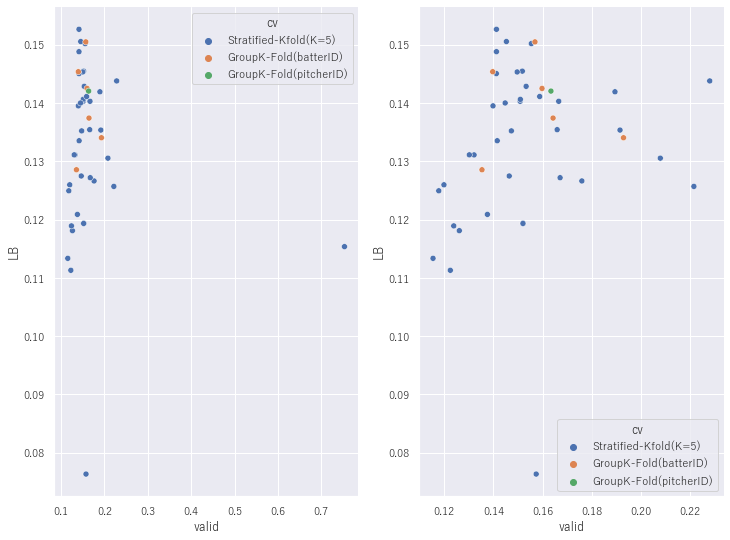

In [9]:
fig = plt.figure(figsize=(12., 9.))
plt.subplot(1, 2, 1)
sns.scatterplot(data=submissions, x='valid', y='LB', hue='cv')
sns.despine()

plt.subplot(1, 2, 2)
sns.scatterplot(data=submissions.query('filename != "008_submission.csv"'), x='valid', y='LB', hue='cv')
sns.despine()

C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1008x1008 with 0 Axes>

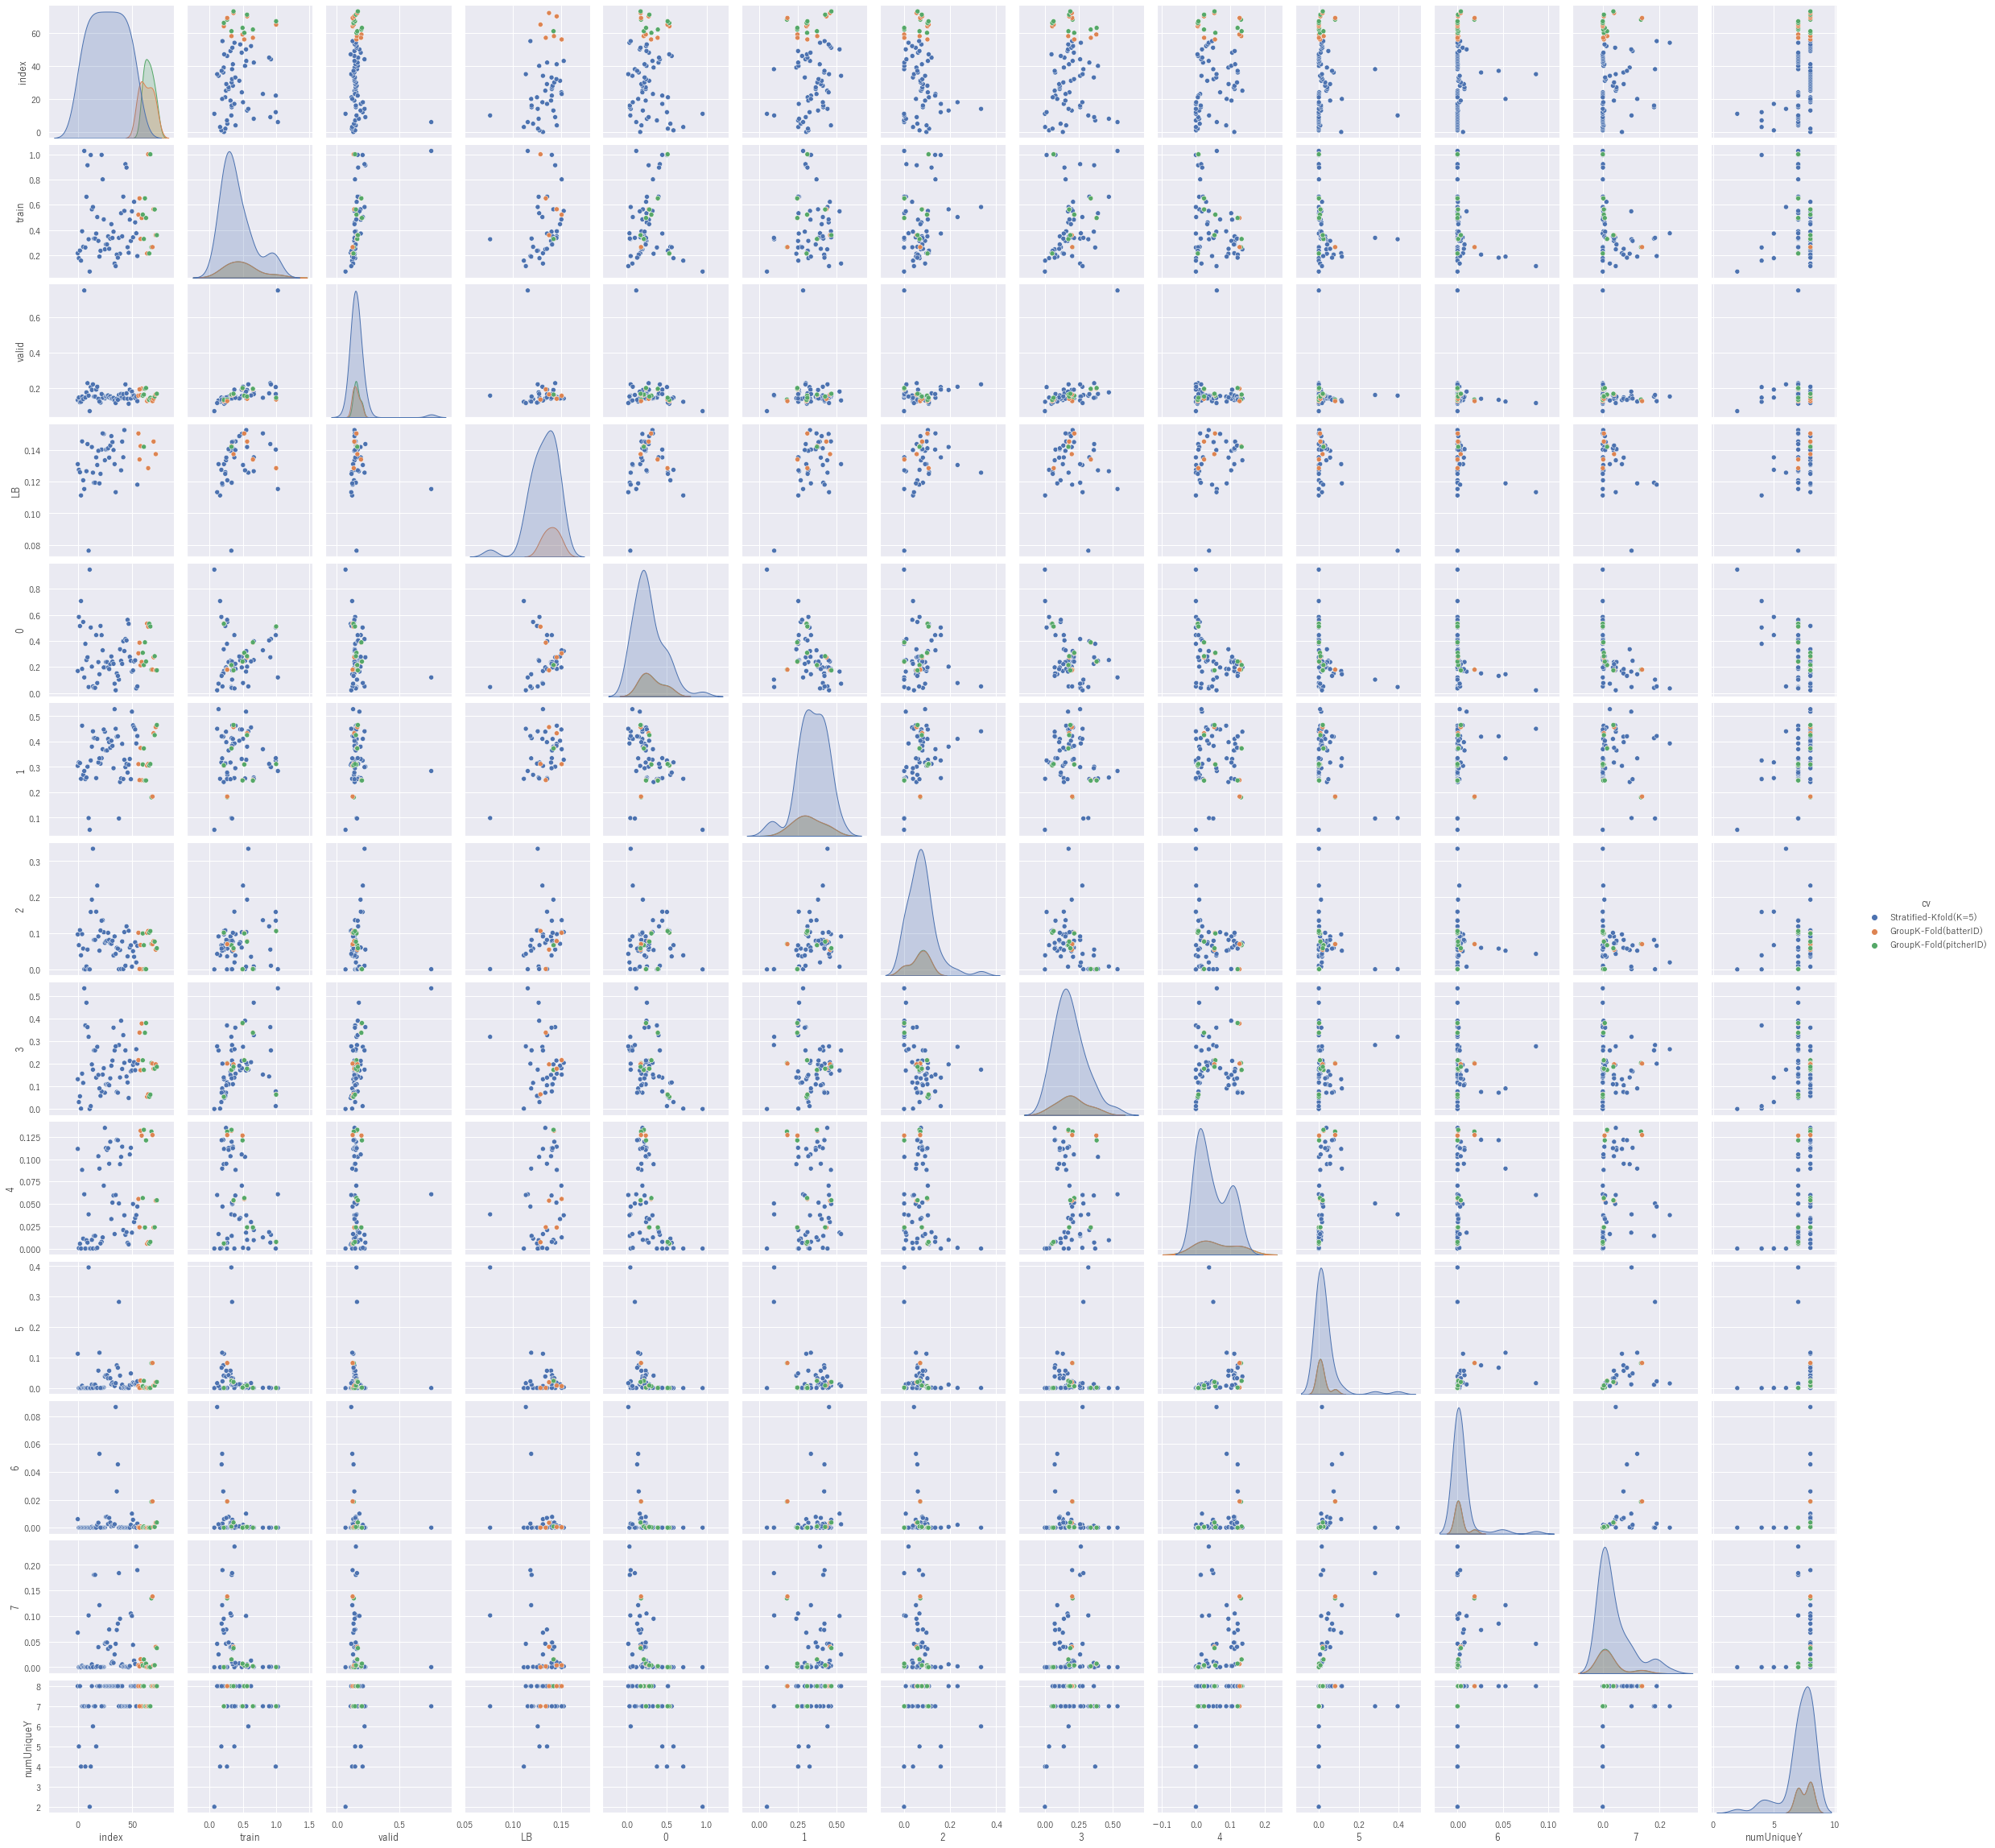

In [10]:
fig = plt.figure(figsize=(14., 14.))
sns.pairplot(submissions, hue='cv')
sns.despine()
fig.savefig(os.path.join('images', 'CVvsLB.png'))

C:\Users\nndropout\miniconda3\envs\ds\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1008x1008 with 0 Axes>

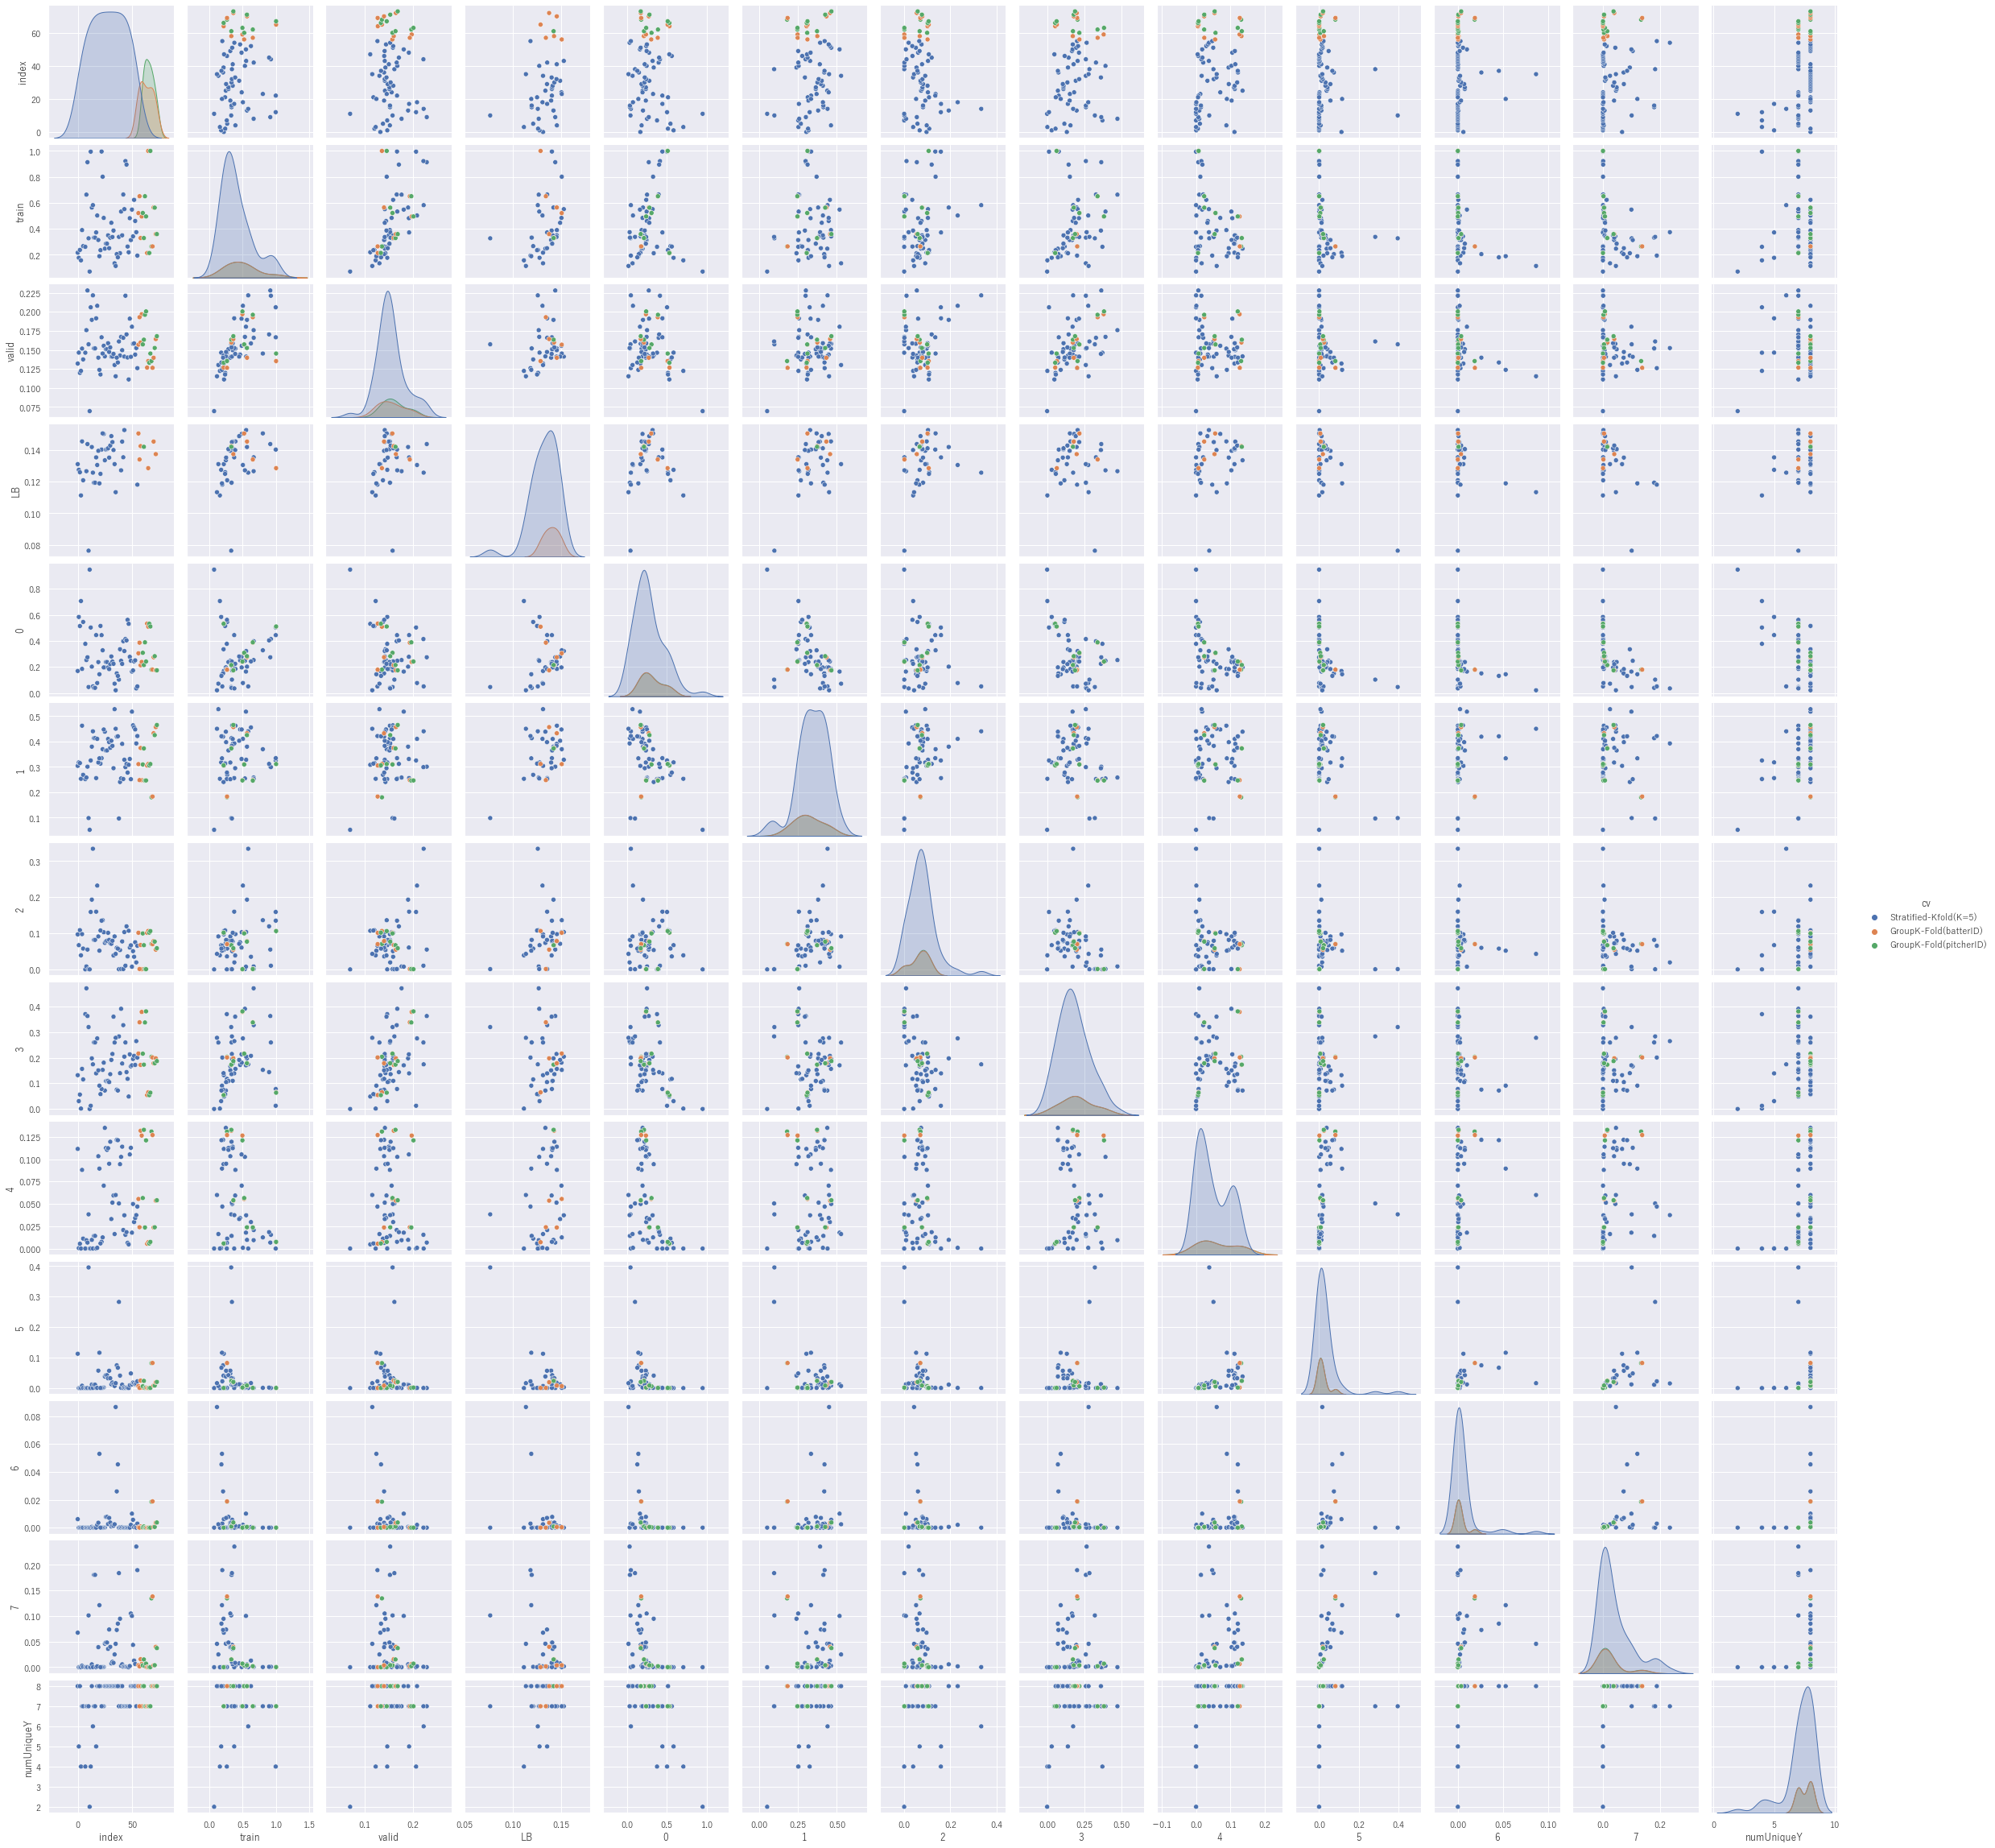

In [10]:
fig = plt.figure(figsize=(14., 14.))
sns.pairplot(submissions.query('filename != "008_submission.csv"'), hue='cv')
sns.despine()

In [6]:
subs

,id,002_submission.csv,003_submission.csv,004_submission.csv,005_submission.csv,006_submission.csv,007_submission.csv,008_submission.csv,009_submission.csv,010_submission.csv,...,052_submission.csv,053_submission.csv,054_submission.csv,055_submission.csv,056_submission.csv,057_submission.csv,058_submission.csv,059_submission.csv,060_submission.csv,061_submission.csv
0,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
1,1,5,1,0,1,1,3,1,0,0,...,1,1,1,1,1,1,1,1,1,1
2,2,4,3,1,2,2,0,3,3,3,...,3,2,3,3,3,3,3,4,2,4
3,3,1,0,0,0,1,0,3,3,3,...,1,1,1,1,1,3,1,1,1,1
4,4,1,0,1,0,1,1,1,1,1,...,1,1,1,4,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33803,33803,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,3,0,0
33804,33804,0,0,1,0,1,0,3,3,3,...,1,1,0,0,1,0,1,1,1,1
33805,33805,7,0,1,0,1,0,3,0,3,...,3,3,0,0,0,0,1,1,1,1
33806,33806,4,2,0,0,3,0,3,3,3,...,1,5,3,2,4,4,3,3,5,5


# Tree feature importances

In [4]:
imp_df = pd.DataFrame()
for filepath in glob.glob(os.path.join('*', 'feature_importances.csv')):
    exp_no = os.path.split(filepath)[0]
    print(exp_no, filepath)
    imp_df_ = pd.read_csv(filepath)
    imp_df_ = imp_df_.groupby('feature').importance.median().reset_index()
    imp_df_['importanceRank'] = imp_df_.importance.rank(ascending=False)
    imp_df_['expNo'] = exp_no
    imp_df = pd.concat([imp_df, imp_df_])
print(f'{imp_df.expNo.nunique()} files found')
imp_df

017 017\feature_importances.csv
018 018\feature_importances.csv
019 019\feature_importances.csv
020 020\feature_importances.csv
021 021\feature_importances.csv
022 022\feature_importances.csv
037 037\feature_importances.csv
038 038\feature_importances.csv
039 039\feature_importances.csv
040 040\feature_importances.csv
041 041\feature_importances.csv
042 042\feature_importances.csv
050 050\feature_importances.csv
051 051\feature_importances.csv
052 052\feature_importances.csv
053 053\feature_importances.csv
054 054\feature_importances.csv
055 055\feature_importances.csv
056 056\feature_importances.csv
057 057\feature_importances.csv
058 058\feature_importances.csv
059 059\feature_importances.csv
060 060\feature_importances.csv
061 061\feature_importances.csv
082 082\feature_importances.csv
083 083\feature_importances.csv
084 084\feature_importances.csv
085 085\feature_importances.csv
28 files found


,feature,importance,importanceRank,expNo
0,10a,18.480120,363.0,017
1,10b,0.000000,462.0,017
2,10c,0.000000,462.0,017
3,10d,13.303220,374.0,017
4,10e,35.575600,335.0,017
...,...,...,...,...
114,speedrange,0.007766,37.0,085
115,speedstd,0.007034,57.0,085
116,speedstdDiff,0.000000,112.0,085
117,totalPitchingCount,0.005274,94.0,085


In [5]:
imp_df.groupby('feature').importanceRank.describe().sort_values('50%').reset_index()

,feature,count,mean,std,min,25%,50%,75%,max
0,pitcherID,28.0,59.321429,108.861806,1.0,1.000,2.50,23.250,352.0
1,distDirU,16.0,53.812500,94.549612,1.0,1.000,3.50,38.500,252.0
2,pca4,3.0,3.333333,2.081666,1.0,2.500,4.00,4.500,5.0
3,Match,28.0,67.821429,104.123432,3.0,3.000,5.00,119.375,344.0
4,batterID,28.0,67.892857,110.703923,1.0,2.000,5.00,87.000,356.0
...,...,...,...,...,...,...,...,...,...
719,2j,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5
720,3b,6.0,404.500000,87.391075,292.0,331.750,454.75,461.125,471.5
721,4b,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5
722,20b,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5


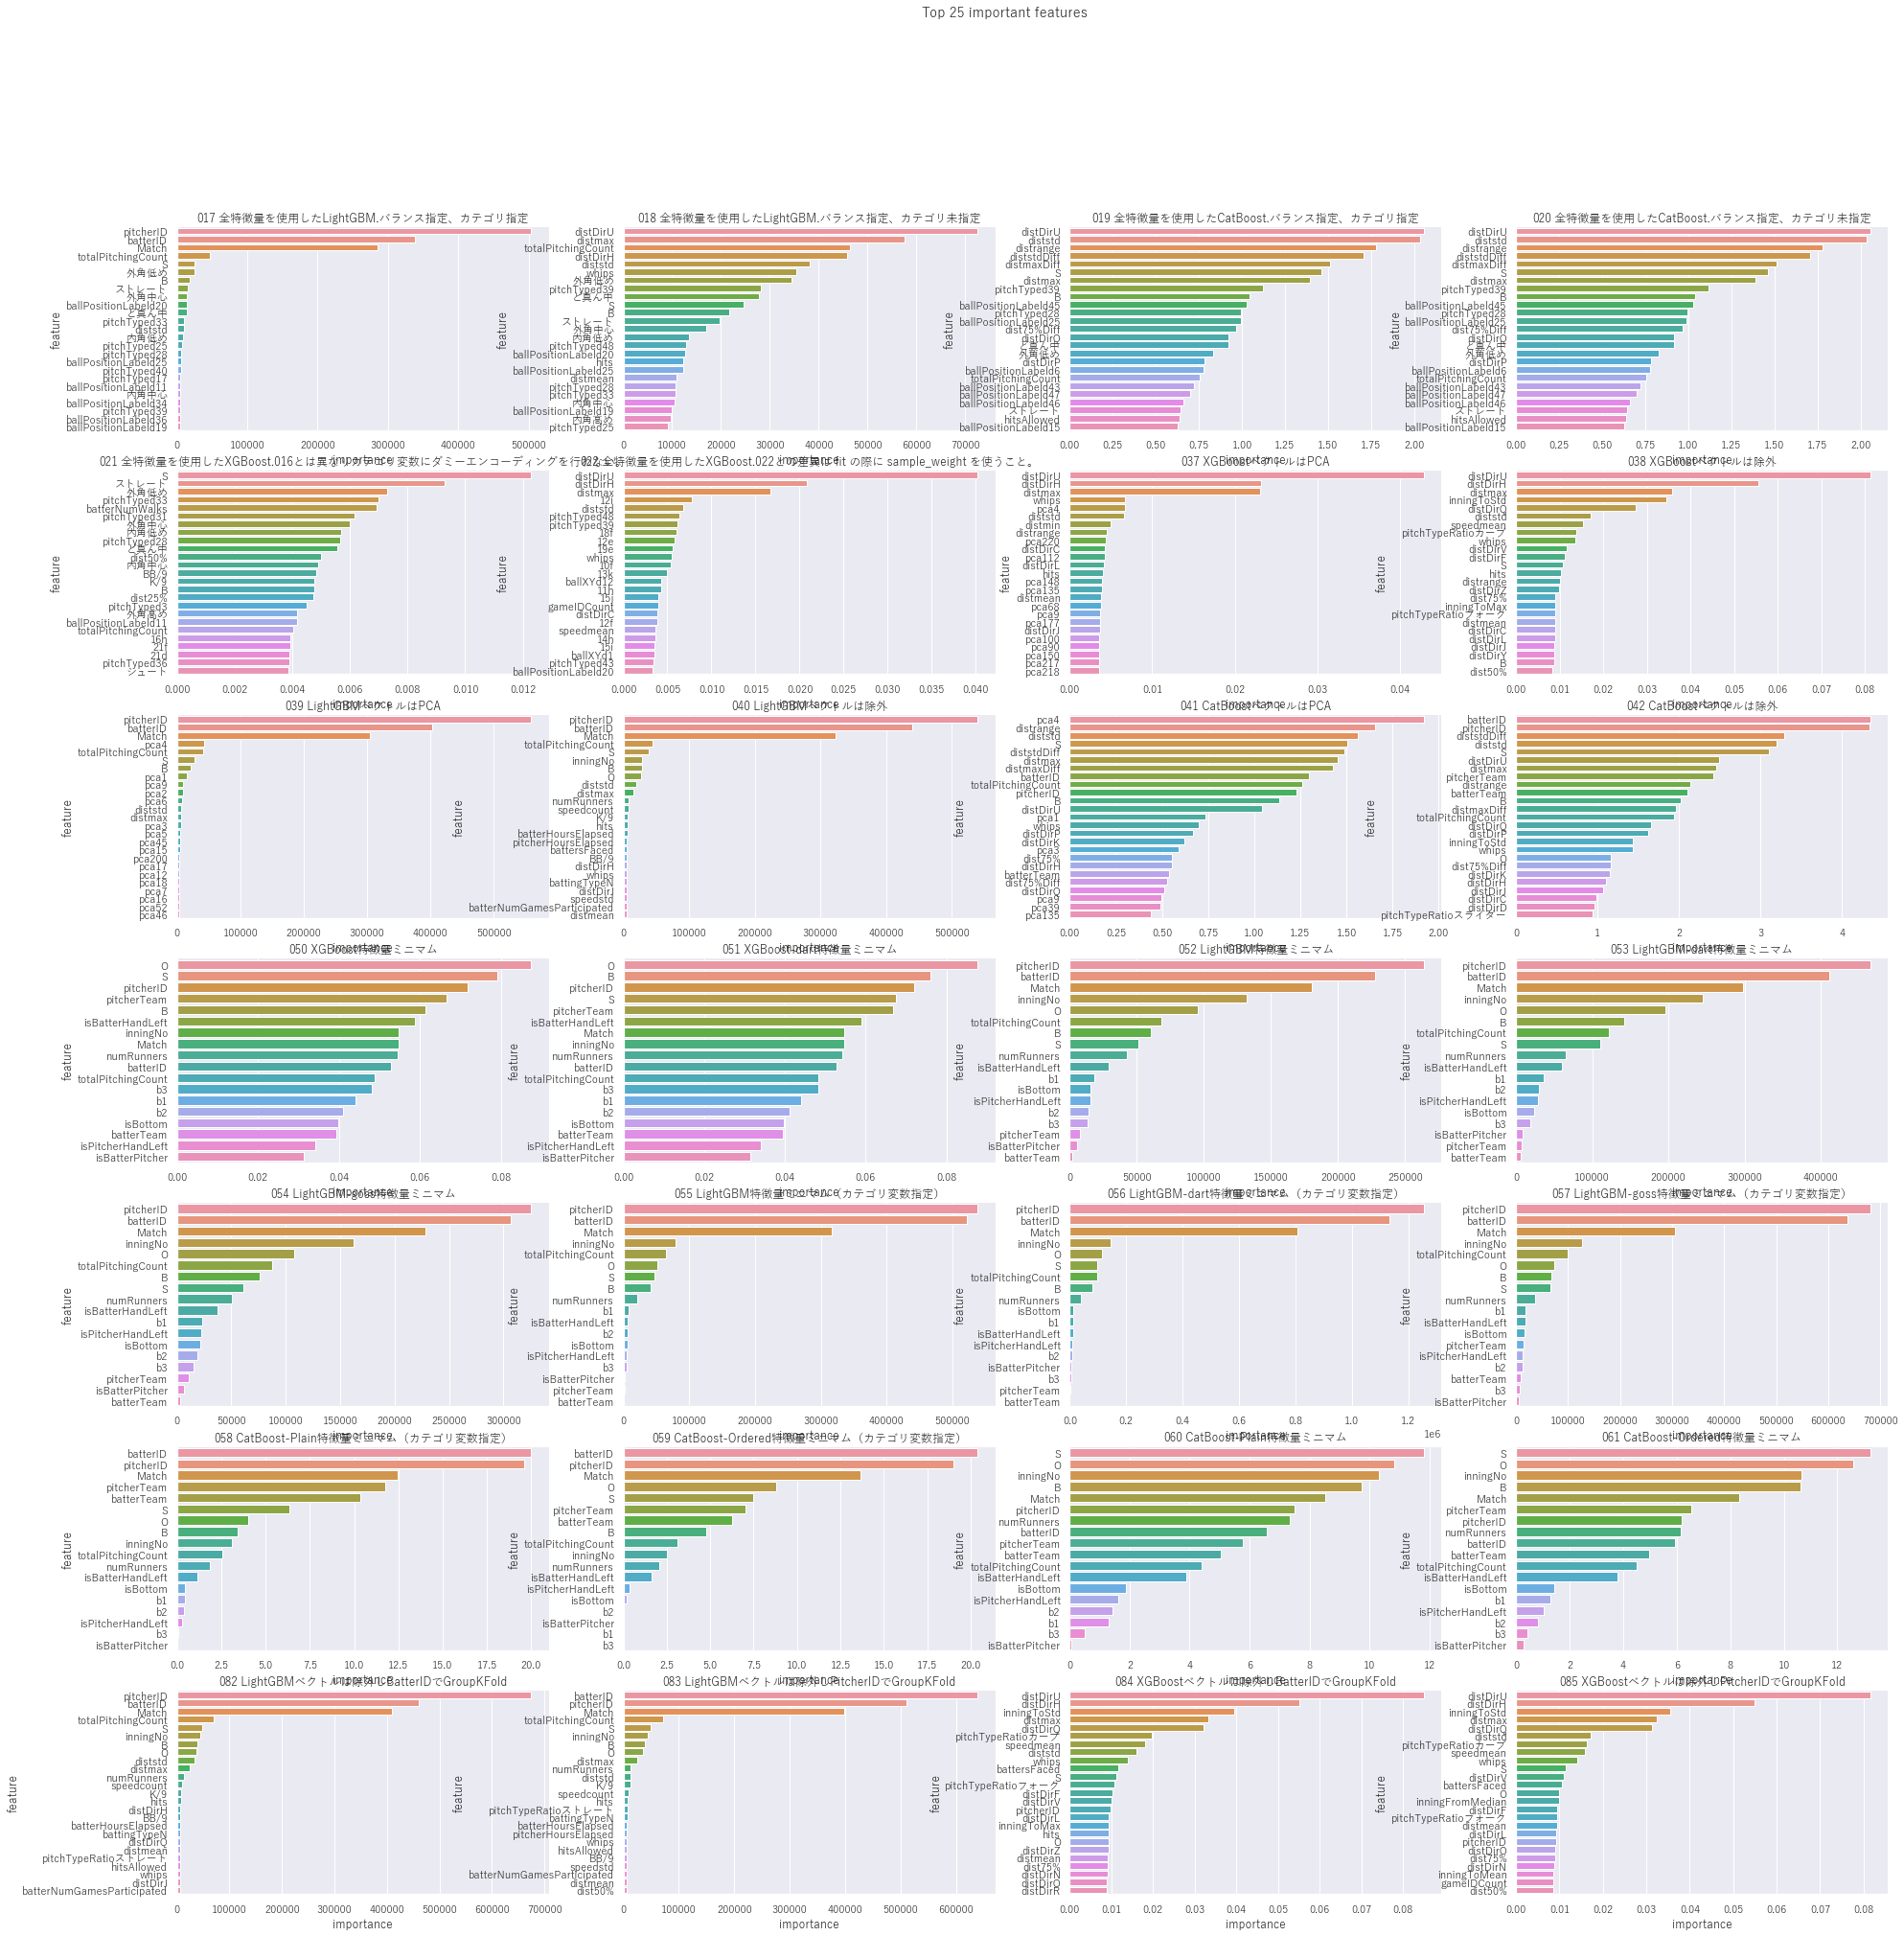

In [7]:
fig = plt.figure(figsize=(32., 32.))
fig.suptitle('Top 25 important features')
for i, (exp_no, df) in enumerate(imp_df.groupby('expNo')):
    plt.subplot(7, 4, i + 1)
    sns.barplot(y='feature', x='importance', data=df.sort_values('importanceRank').head(25))
    plt.title(exp_no + ' ' + submissions.query(f'expNo == "{exp_no}"').Note.values[0])
    sns.despine()

# Confusion matrices

In [6]:
for filepath in glob.glob(os.path.join('*', 'cross_validation.csv')):
    cv_result = pd.read_csv(filepath)
    dirname = os.path.dirname(filepath)
    exp_no = dirname[:3]
    experiment = submissions.query(f'expNo == "{exp_no}"').Note.values[0]
    print(f'--------------------{exp_no}: {experiment}--------------------')
    for fold in np.sort(cv_result.fold.unique()):
        for i in np.sort(cv_result.train.unique()):
            print(f'Fold: {fold}, train: {i}')
            _ = cv_result.query(f'fold == {fold} and train == {i}')
            print(confusion_matrix(_.actual, _.prediction, labels=y_labels))
            print()

--------------------007: 全特徴量を使用したKNN--------------------
Fold: 1, train: 0
[[4828  823  425  239   15    3    0    0]
 [2346 1844  265  202   23    1    0    1]
 [1482  509  861  126   10    2    0    2]
 [ 971  349  201  597   15    3    0    0]
 [ 345  133   54   95   47    1    0    0]
 [ 111   24   12   35    1    4    0    0]
 [   5    4    1    1    0    0    0    0]
 [  66   17   11   20    2    1    0    3]]

Fold: 2, train: 0
[[4821  798  469  219   23    3    0    0]
 [2384 1817  259  195   25    1    0    1]
 [1431  507  910  129   13    1    0    1]
 [ 991  339  209  565   28    3    0    1]
 [ 342  123   57   95   56    1    0    1]
 [ 105   29   15   26    5    7    0    0]
 [   5    5    1    0    0    0    0    0]
 [  62   20    8   23    3    1    0    3]]

Fold: 3, train: 0
[[4896  799  403  211   21    1    0    2]
 [2395 1790  285  193   15    1    0    3]
 [1505  479  867  129   11    1    0    0]
 [1011  367  187  553   13    4    0    1]
 [ 337  121   66  114   

[[5242  580  420   58   11    7    7    8]
 [ 446 3853  300   68    3    2    5    5]
 [ 229  277 2385   44   38   11    1    7]
 [ 111   88   30 1894   12    0    0    1]
 [  36   32   16   44  547    0    0    0]
 [   7   13    5   12    0  150    0    0]
 [   0    1    0    1    0    0    9    0]
 [   5   13    1    4    1    0    0   96]]

Fold: 4, train: 0
[[5210  603  433   76    4    4    3    0]
 [ 441 3910  230   89    3    0    5    4]
 [ 216  273 2368   60   51   12    1   11]
 [ 109   93   31 1892   11    0    0    0]
 [  45   28   13   44  545    0    0    0]
 [   4    4    8   17    4  150    0    0]
 [   0    1    1    0    0    0    9    0]
 [   5    9    0   10    0    0    0   96]]

Fold: 5, train: 0
[[5193  600  440   77   14    4    3    2]
 [ 432 3895  274   64    6    1    4    6]
 [ 206  274 2373   62   56   10    1   10]
 [ 105  115   37 1872    7    0    0    0]
 [  36   34   10   49  546    0    0    0]
 [   5   13    2   17    1  149    0    0]
 [   1    0   

[[2768 1593  957  476  282  128   11  118]
 [ 734 2698  543  380  182   77    7   61]
 [ 505  546 1403  264  165   64    1   44]
 [  67   65  193 1684   91   14    1   21]
 [  10    9   27   59  564    3    0    3]
 [   2    4    7   17    6  151    0    0]
 [   0    0    1    1    1    0    8    0]
 [   1    2    9    8    3    0    0   97]]

Fold: 2, train: 0
[[2673 1625 1032  468  276  124   12  123]
 [ 695 2686  569  410  168   74    8   72]
 [ 464  584 1426  259  159   49    2   49]
 [  65   60  187 1718   86    5    1   14]
 [  11   10   30   61  559    1    0    3]
 [   3    5    9   10   10  150    0    0]
 [   0    1    0    1    0    0    9    0]
 [   1    0    5   10    7    1    0   96]]

Fold: 3, train: 0
[[2815 1489 1005  472  278  142   10  122]
 [ 755 2653  539  394  193   79    8   61]
 [ 520  557 1418  262  132   57    2   44]
 [  64   61  173 1714   91   11    0   22]
 [  12   13   22   63  561    0    0    4]
 [   4    2    3   17    7  152    0    2]
 [   0    0   

 [   0    3    7    3    6    0    0  101]]

--------------------023: SVM(C=0.1)ベクトルはPCA--------------------
Fold: 1, train: 0
[[2314  469  642  482  614  334    6  205]
 [1447  663  377  361  545  211    4  138]
 [ 520  255  772  249  368  156    1   72]
 [ 204  143  316  534  311  132    0   69]
 [  31   23   37   29  369   34    0   17]
 [   0    4    1    4    2  138    0    1]
 [   0    0    0    0    0    0    8    0]
 [   0    0    0    0    0    0    0   96]]

Fold: 1, train: 1
[[506 106 188 137 166 100   5  59]
 [354 120 124 106 124  71   2  35]
 [150  58 142  66 106  54   0  23]
 [ 63  35  89  91  86  40   0  23]
 [ 18   5  26  20  41  17   0   8]
 [  6   2   5   5  11   4   0   4]
 [  0   0   1   0   1   0   0   1]
 [  3   0   3   2  13   2   0   1]]

Fold: 2, train: 0
[[2166  585  422  766  576  304    8  239]
 [1325  780  229  571  447  218    6  170]
 [ 564  304  564  405  312  138    1  105]
 [ 189  146  205  716  260  108    0   85]
 [  27   29   43   57  339   26    0 

[[2239  829  775  590  389  150   10   85]
 [ 678 1755  488  445  240   89    7   43]
 [ 293  294 1207  311  204   53    1   31]
 [  50   55  212 1377   15    0    0    0]
 [   0    0    6    1  533    0    0    0]
 [   0    0    0    0    0  149    0    0]
 [   0    0    0    0    0    0    9    0]
 [   0    0    0    0    0    0    0   96]]

Fold: 5, train: 1
[[401 286 243 170 101  38   0  27]
 [247 289 139 154  77  22   0   9]
 [104 118 152 136  62  13   0  13]
 [ 53  93 103 156  21   1   0   0]
 [ 14  28  32  50  11   0   0   0]
 [  9   4   8  15   2   0   0   0]
 [  0   1   0   1   0   0   0   0]
 [  5   4   4   8   3   0   0   0]]

--------------------026: SVM(C=1.0)ベクトルは除外--------------------
Fold: 1, train: 0
[[1487 1242  595  618  594  308   17  205]
 [ 530 1850  341  354  344  182   12  133]
 [ 307  446  733  360  336  126    7   78]
 [ 199  288  219  721  203   44    2   33]
 [  21   33   23   24  413   16    1    9]
 [   0    0    0    0    0  150    0    0]
 [   0    0    

 [   0    0    0    0    0    0    0   96]]

Fold: 2, train: 1
[[378 279 239 199 106  37   5  24]
 [212 306 194 111  70  24   2  17]
 [124 131 144 125  54  12   0   9]
 [ 92  90 122  88  28   3   1   3]
 [ 34  31  37  22   8   1   0   2]
 [ 15   8   8   3   1   2   0   0]
 [  0   1   1   0   0   0   0   0]
 [  8   5   5   3   2   1   0   0]]

Fold: 3, train: 0
[[2294  815  750  608  380  132    7   80]
 [ 480 2069  507  319  230   81    7   53]
 [ 252  244 1302  292  228   49    1   26]
 [  99  104  142 1288   59   10    1    5]
 [   0    0    1    0  537    2    0    0]
 [   0    0    0    0    0  150    0    0]
 [   0    0    0    0    0    0    9    0]
 [   0    0    0    0    0    0    0   96]]

Fold: 3, train: 1
[[378 330 225 163 107  39   5  20]
 [235 308 180 120  55  21   1  16]
 [139 114 157 113  45  16   1  13]
 [109  88 125  66  31   6   0   3]
 [ 40  25  34  23   9   2   0   2]
 [ 10  11   9   3   3   1   0   0]
 [  1   0   0   1   0   0   0   0]
 [  6   6   6   3   2   0   

 [   0    0    0    0    0    0    0   96]]

Fold: 5, train: 1
[[576 302 223 110  37  13   0   5]
 [295 370 169  77  18   6   0   2]
 [164 154 161  90  20   4   0   5]
 [123 102 121  67  11   3   0   0]
 [ 45  36  21  26   7   0   0   0]
 [ 13  12   5   3   4   1   0   0]
 [  0   1   1   0   0   0   0   0]
 [  6   9   4   5   0   0   0   0]]

--------------------031: KNNベクトルはPCA--------------------
Fold: 1, train: 0
[[4092  560  276  129    7    0    0    2]
 [1785 1669  167  109   16    0    0    0]
 [1125  395  783   82    7    1    0    0]
 [ 760  279  183  477   10    0    0    0]
 [ 281  116   46   57   38    2    0    0]
 [  95   14   11   23    2    5    0    0]
 [   3    3    1    1    0    0    0    0]
 [  48   20   11   12    3    0    0    2]]

Fold: 1, train: 1
[[745 311 130  75   5   1   0   0]
 [587 211  76  56   6   0   0   0]
 [367 121  81  25   5   0   0   0]
 [243  93  30  58   3   0   0   0]
 [ 84  21   9  17   4   0   0   0]
 [ 21   7   3   6   0   0   0   0]
 [  2 

[[2382  883  693  459  398  155    6   91]
 [ 642 1710  457  402  296  152    4   82]
 [ 377  340  948  316  244  115    1   53]
 [  98  110  174 1017  184   82    0   44]
 [   9   12   16   31  467    4    0    1]
 [   0    0    0    0    0  149    0    0]
 [   0    0    0    0    0    0    9    0]
 [   0    0    0    0    0    0    0   96]]

Fold: 5, train: 1
[[505 290 189 115  95  52   0  20]
 [216 324 133 100  96  46   0  22]
 [115 133 132  94  70  35   0  19]
 [ 33  60  73 135  79  31   0  16]
 [ 10  19  23  43  24   7   0   9]
 [  2   5   5  10   7   6   0   3]
 [  0   0   0   1   1   0   0   0]
 [  2   5   4   7   1   2   0   3]]

--------------------034: ロジスティック回帰ベクトルは除外--------------------
Fold: 1, train: 0
[[1481  889  573  637  650  467   20  349]
 [ 484 1565  385  394  363  306   15  234]
 [ 255  331  735  370  352  199   10  141]
 [ 167  181  174  773  236  101    3   74]
 [  31   25   19   19  390   34    1   21]
 [   0    0    0    0    1  147    0    2]
 [   0    0    0

 [   0    0    0    0    0    0    0   96]]

Fold: 2, train: 1
[[300 315 164 165 120  98  17  88]
 [188 332  97 112  74  43   8  82]
 [ 85 119 106 118  69  37   5  60]
 [ 71  74  77 110  40  23   4  28]
 [ 20  18  34  24  18   9   0  12]
 [  4   8   5   4   9   3   0   4]
 [  0   1   0   0   1   0   0   0]
 [  8   2   3   2   2   3   0   4]]

Fold: 3, train: 0
[[1648 1116  556  594  397  329   44  382]
 [ 444 1863  322  389  233  199   32  264]
 [ 302  364  777  383  216  153   18  181]
 [ 168  202  132  917   90   81   12  106]
 [  35   36   26   36  339   32    3   33]
 [   0    1    0    0    1  146    0    2]
 [   0    0    0    0    0    0    9    0]
 [   0    0    0    0    0    0    0   96]]

Fold: 3, train: 1
[[334 311 152 165  99  79  15 112]
 [191 365  77 114  49  56  12  72]
 [106  98 105 140  60  31   2  56]
 [ 80  74  65 112  42  21   3  31]
 [ 24  26  23  23  15   9   2  13]
 [  5  11   7   3   4   2   0   5]
 [  1   0   0   0   0   1   0   0]
 [  4   4   4   2   2   2   

 [   0    0    0    0    0    0    0   96]]

Fold: 5, train: 1
[[298 337 196 178 141  72   0  44]
 [213 328 106 114 107  46   2  21]
 [110 114 115 125  80  28   2  24]
 [ 71 102 101  81  49  15   3   5]
 [ 29  21  21  41  16   5   0   2]
 [  8  12   5   4   7   1   0   1]
 [  0   0   1   1   0   0   0   0]
 [  4   7   4   4   3   0   0   2]]

--------------------041: CatBoostベクトルはPCA--------------------
Fold: 1, train: 0
[[ 934 1371  834  563  336  268    6  754]
 [ 288 1712  505  393  204  155    4  485]
 [ 149  436  888  304  203  120    1  292]
 [  56  219  261  792   72   68    0  241]
 [  10   34   19    5  394   15    0   63]
 [   0    0    0    0    0  148    0    2]
 [   0    0    0    0    0    0    8    0]
 [   0    0    0    0    0    0    0   96]]

Fold: 1, train: 1
[[167 368 221 168  92  76   5 170]
 [111 337 138 104  63  49   2 132]
 [ 55 113 166 106  58  27   0  74]
 [ 19  65  82 124  37  30   0  70]
 [  7  16  35  25  14  13   0  25]
 [  2   3   5   9   9   3   0   6]
 

Fold: 1, train: 0
[[1660 2172  832  852  559  153    4  101]
 [ 609 2459  539  566  361   93    4   51]
 [ 385  661 1018  516  314   62    0   36]
 [ 222  456  267  955  193   30    1   12]
 [  38   63   42   37  488    6    0    1]
 [   7    9    2    8    8  153    0    0]
 [   2    0    0    1    0    0    8    0]
 [   1    8    7    4    4    0    0   96]]

Fold: 2, train: 0
[[1680 2168  783  841  623  140    5   93]
 [ 646 2402  489  594  395   99    5   52]
 [ 421  670  985  498  319   61    1   37]
 [ 248  483  255  937  187   15    2    9]
 [  39   56   50   36  489    3    0    2]
 [   8    8    8    7    4  152    0    0]
 [   1    1    0    0    0    0    9    0]
 [   4    8    6    2    4    0    0   96]]

Fold: 3, train: 0
[[1764 2041  859  824  584  158    9   94]
 [ 654 2386  563  550  381   96    5   47]
 [ 385  644 1048  504  311   65    1   34]
 [ 266  447  287  935  171   22    0    8]
 [  42   53   41   36  498    5    0    0]
 [   6   11    8    8    3  151    0   

 [   1    6    3    5    3    2    1   99]]

Fold: 4, train: 0
[[1837 1116  724  797  816  576   32  435]
 [ 653 1799  485  523  502  371   27  322]
 [ 348  427  853  455  449  248   19  193]
 [ 220  271  262  832  288  143   12  108]
 [  58   45   41   46  406   47    3   29]
 [   3    7    7    9    6  149    1    5]
 [   0    1    0    1    0    0    9    0]
 [   6    7    5    0    4    0    0   98]]

Fold: 5, train: 0
[[1789 1140  720  787  858  563   31  445]
 [ 681 1827  477  478  498  389   26  306]
 [ 328  429  851  458  442  249   17  218]
 [ 209  256  270  865  268  143   14  111]
 [  55   47   36   47  416   38    1   35]
 [   8    5    5    5    8  148    0    8]
 [   0    0    0    1    1    0    9    0]
 [   2    5    5    3    5    2    0   98]]

--------------------049: リッジ回帰特徴量ミニマム--------------------
Fold: 1, train: 0
[[1027 1400  418  512  623  863  474 1016]
 [ 435 1690  218  313  374  613  332  707]
 [ 259  490  390  349  361  455  234  454]
 [ 192  328  165  426 

 [   4    4    3    1    6    2    0  100]]

--------------------053: LightGBM-dart特徴量ミニマム--------------------
Fold: 1, train: 0
[[1372 1818  683  663  567  510   61  659]
 [ 631 2012  402  367  383  359   44  484]
 [ 421  539  736  380  301  293   24  298]
 [ 248  353  306  573  229  202   10  215]
 [  46  100   89   54  262   53    8   63]
 [  14   14    7    7    8  129    1    7]
 [   1    0    1    0    0    0    9    0]
 [   4    6    6    1    4    2    0   97]]

Fold: 2, train: 0
[[1604 1758  593  609  759  499   54  457]
 [ 757 1973  340  386  501  330   52  343]
 [ 466  518  643  392  400  277   36  260]
 [ 303  350  238  509  334  187   28  187]
 [  78   80   64   53  300   41    7   52]
 [   9   14    6    9   14  128    1    6]
 [   0    0    0    0    1    0   10    0]
 [   7    6    3    2    5    7    0   90]]

Fold: 3, train: 0
[[1414 1835  750  609  618  467   62  578]
 [ 622 2086  403  373  430  305   45  418]
 [ 410  578  744  326  343  287   29  275]
 [ 268  390  2

--------------------058: CatBoost-Plain特徴量ミニマム（カテゴリ変数指定）--------------------
Fold: 1, train: 0
[[ 675 2211 1745   40   85  760  476  341]
 [ 430 2044  952   42   46  490  470  208]
 [ 245  625 1368    8   30  402  230   84]
 [ 181  486 1014   22   17  228  101   87]
 [  73  135  313    2   12   79   16   45]
 [  25   38   68    1    2   37    4   12]
 [   2    0    3    0    0    1    5    0]
 [  16   24   29    1    1   10    6   33]]

Fold: 2, train: 0
[[ 660 2204  619  107  365  170  152 2056]
 [ 330 2158  316  121  217  119  149 1272]
 [ 267  675  719   80  178   69   93  911]
 [ 195  468  459   72  137   86   79  640]
 [  64  139  149   13   45   34   16  215]
 [  17   41   21    2   17   21    2   66]
 [   0    2    2    0    0    0    7    0]
 [   8   24    9    0    4    5    1   69]]

Fold: 3, train: 0
[[ 490 2250  937  235   83  715  262 1361]
 [ 253 2188  498  202  102  412  161  866]
 [ 194  662  853  217   62  336  116  552]
 [ 198  465  550  175   54  275   89  330]
 [  7

[[2345  917  847  697  483  161   12  108]
 [ 545 2224  542  384  287   89    7   65]
 [ 268  309 1348  342  270   65    1   39]
 [ 105  122  148 1407   85   16    2    8]
 [   0    0    1    0  600    2    0    0]
 [   0    0    0    0    0  161    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  102]]

Fold: 4, train: 1
[[207 312  75 132  36   1   0   0]
 [129 256  56  81  15   0   0   2]
 [ 66 119  44  83  33   1   0   4]
 [ 51  74  28  67  23   0   0   0]
 [ 13  18  11  24   6   0   0   0]
 [  4   8   7   5   2   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  3  11   0   2   1   0   0   1]]

Fold: 5, train: 0
[[2445  945  847  693  481  168   12  116]
 [ 544 2266  571  371  286   99    6   69]
 [ 292  304 1391  352  255   66    2   35]
 [ 124  109  168 1394   83   17    2    7]
 [   0    0    1    1  615    3    0    0]
 [   0    0    0    0    0  169    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    

[[1600 1349  651  709  719  423   25  277]
 [ 589 1946  381  427  418  264   23  172]
 [ 332  492  753  453  373  181   11  119]
 [ 202  330  214  825  213   76    5   45]
 [  28   37   21   42  450   19    0   10]
 [   0    0    0    0    0  171    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  111]]

Fold: 8, train: 1
[[133 242  35 107  53   6   0   4]
 [ 70 251  31  66  36   3   0   5]
 [ 50  80  30  69  44   4   0   1]
 [ 36  67  20  63  35   3   0   2]
 [ 10  17   5  17  16   1   0   2]
 [  3   3   2   4   4   0   0   0]
 [  0   0   1   0   0   0   0   0]
 [  1   2   2   1   2   1   0   0]]

Fold: 9, train: 0
[[1678 1325  635  696  716  402   25  262]
 [ 601 1966  402  413  429  258   22  168]
 [ 343  485  759  428  413  165   11  110]
 [ 208  348  232  818  213   73    5   39]
 [  29   36   19   35  461   22    1    9]
 [   0    0    0    0    0  167    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    

[[409 152  65 104   6   0   0   0]
 [188 213  66  63   6   0   0   0]
 [129  85  45 101  10   0   0   0]
 [ 37  51  22 126   5   0   0   0]
 [ 12  19  10  54   4   0   0   0]
 [  2   7   4   9   0   0   0   0]
 [  1   0   1   0   0   0   0   0]
 [  1   6   2   4   0   0   0   0]]

Fold: 2, train: 0
[[3480  693  870  170  244  103    9   79]
 [ 441 2735  733   78  116   62    8   52]
 [ 289  243 1694  211  150   47    2   30]
 [   0    0   29 1911    0    0    0    0]
 [   0    0    0    0  599    0    0    0]
 [   0    0    0    0    0  162    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  107]]

Fold: 2, train: 1
[[383 157  46  91   8   0   0   0]
 [151 190  55  55   6   0   0   0]
 [133  74  30  80   9   0   0   0]
 [ 43  45   9  90   8   1   0   0]
 [ 20  14   9  28   5   0   0   0]
 [  4   4   3  11   3   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  3   3   0   6   1   0   0   0]]

Fold: 3, train: 0
[[3496  682  882  162  246  106    9

[[2428  961  850  716  490  169   12  116]
 [ 557 2303  557  387  304   94    7   67]
 [ 279  322 1400  364  270   66    1   42]
 [ 120  124  179 1406   90   14    2    9]
 [   0    0    1    1  615    3    0    0]
 [   0    0    0    0    0  170    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  110]]

Fold: 5, train: 1
[[206 182  49 112  35   6   0   1]
 [108 148  31  87  26   3   0   3]
 [ 50  64  27  83  22   2   0   0]
 [ 39  51  22  65  13   2   0   0]
 [ 10  12   8  21   4   0   0   0]
 [  7   3   1   5   1   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  2   2   1   5   0   0   0   0]]

Fold: 6, train: 0
[[2390  940  854  733  464  158   13  116]
 [ 557 2264  550  396  270   94    6   69]
 [ 292  301 1389  344  251   62    2   44]
 [ 128  116  162 1403   91   16    2    9]
 [   0    0    1    1  596    2    0    0]
 [   0    0    0    0    0  166    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    

[[1690 1377  627  706  702  426   19  273]
 [ 602 2002  412  429  424  266   21  174]
 [ 351  515  761  440  405  176   10  115]
 [ 216  345  230  839  228   77    5   41]
 [  28   42   21   41  458   22    1   10]
 [   0    0    0    0    0  175    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  110]]

Fold: 9, train: 1
[[175 119  37  66  42  60   0  14]
 [ 90 140  19  36  29  30   0   8]
 [ 70  35  26  35  27  25   0   1]
 [ 34  38  15  38  13  14   0   3]
 [  9  13   9   6  11   3   0   1]
 [  1   1   0   4   3   1   0   2]
 [  0   1   0   0   0   0   0   0]
 [  0   1   0   1   4   3   0   1]]

Fold: 10, train: 0
[[1661 1377  675  716  752  425   25  286]
 [ 595 2005  415  444  429  274   23  180]
 [ 352  508  765  449  401  182   10  127]
 [ 220  338  250  844  216   78    5   43]
 [  31   45   24   40  463   21    1   10]
 [   0    0    0    0    0  173    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0   

 [   0    0    0    0    0    0    0  107]]

Fold: 2, train: 1
[[294 195  99 164  28   0   0   0]
 [134 230  55 127  29   0   0   0]
 [ 67  87  64 118  29   0   0   0]
 [ 15  32  31 165  32   0   0   0]
 [ 11   9  15  37  15   0   0   0]
 [  2   3   2  10   2   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  2   2   1   7   1   0   0   0]]

Fold: 3, train: 0
[[2275  906  940  690  510  199   13  138]
 [ 763 1765  576  493  324  124    7   69]
 [ 329  311 1266  348  246   69    2   47]
 [  61   55  272 1466   23    0    0    0]
 [   1    0    6    1  585    0    0    0]
 [   0    0    0    0    0  163    0    0]
 [   0    0    0    0    0    0    9    0]
 [   0    0    0    0    0    0    0  108]]

Fold: 3, train: 1
[[213 209  87 126  27   0   0   0]
 [107 260  59 106  28   1   0   0]
 [ 65  89  68 128  24   0   0   0]
 [ 20  33  33 150  21   2   0   0]
 [  5   7  16  40  14   0   0   0]
 [  1   3   3  11   6   0   0   0]
 [  0   1   0   1   0   0   0   0]
 [  0   2   1   7   2   0   

[[4717  604  328   36    6    0    0    0]
 [2097 1886  190   25    5    1    0    0]
 [1297  442  921   42    6    0    0    0]
 [1104  372  265  154    3    0    0    0]
 [ 374  130   77    7   21    0    0    0]
 [ 116   34   20    0    0    1    0    0]
 [   8    1    1    0    0    0    0    0]
 [  77   23   10    0    1    0    0    0]]

Fold: 6, train: 1
[[412 168  45  14   3   0   0   0]
 [307 113  46  12   0   0   0   0]
 [179  69  23   8   5   0   0   0]
 [149  51  24  10   3   1   0   0]
 [ 36  21   7   1   1   0   0   0]
 [  9   5   1   1   0   0   0   0]
 [  1   0   0   0   0   0   0   0]
 [  6   1   2   0   0   0   0   0]]

Fold: 7, train: 0
[[4780  607  315   39    6    0    0    0]
 [2117 1883  187   30    5    1    0    0]
 [1321  447  917   41    6    0    0    0]
 [1120  399  269  155    3    0    0    0]
 [ 380  124   78   10   21    0    0    0]
 [ 121   37   18    0    0    1    0    0]
 [   8    1    1    0    0    0    0    0]
 [  79   21   10    0    1    0    

[[5884    0    0    0    0    0    0    0]
 [   0 4326    0    0    0    0    0    0]
 [   0    0 2759    0    0    0    0    0]
 [   0    0    0 1975    0    0    0    0]
 [   0    0    0    0  627    0    0    0]
 [   0    0    0    0    0  175    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  113]]

Fold: 10, train: 1
[[231 124  60  29   4   1   0   0]
 [164 117  42  26   3   3   0   1]
 [101  73  27  28   4   0   0   0]
 [ 74  37  28  19   3   0   0   0]
 [ 17  15  11   5   0   0   0   0]
 [  4   4   4   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  3   2   2   0   0   0   0   0]]

--------------------072: KNNベクトルは除外しPitcherIDでGroupKFold--------------------
Fold: 1, train: 0
[[4708  606  320   36    8    0    0    0]
 [2101 1835  190   29    4    1    0    0]
 [1278  442  893   37    6    0    0    0]
 [1102  385  271  145    2    0    0    0]
 [ 383  122   76    9   23    0    0    0]
 [ 118   34   19    0    0    1    0    0]


 [   0    0    0    0    0    0    0  108]]

Fold: 3, train: 1
[[329 205  60  60   6   1   1   0]
 [228 195  79  51   6   0   1   1]
 [172 109  51  36   5   0   1   0]
 [117  55  44  41   2   0   0   0]
 [ 36  17  12  10   5   1   0   1]
 [ 12   7   2   3   0   0   0   0]
 [  1   1   0   0   0   0   0   0]
 [  3   5   3   1   0   0   0   0]]

Fold: 4, train: 0
[[5667    0    0    0    0    0    0    0]
 [   0 4210    0    0    0    0    0    0]
 [   0    0 2663    0    0    0    0    0]
 [   0    0    0 1918    0    0    0    0]
 [   0    0    0    0  606    0    0    0]
 [   0    0    0    0    0  156    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  106]]

Fold: 4, train: 1
[[323 157 107  71   7   1   0   0]
 [207 157  60  41   7   0   0   0]
 [128  77  61  51   7   1   0   4]
 [ 93  47  43  30   5   0   0   0]
 [ 29  20  10   9   1   0   0   0]
 [ 13   6   8   3   0   0   0   1]
 [  0   0   1   0   0   0   0   0]
 [  7   4   2   1   0   0   

[[177 137  58 154  47  82  17  76]
 [111 160  36 112  32  53  11  57]
 [ 62  43  31  86  27  39   9  31]
 [ 39  34  21  85  26  30   9  18]
 [ 12   7   4  20   8  13   1   6]
 [  5   3   1   4   0   2   0   1]
 [  0   1   0   0   0   0   0   0]
 [  4   1   0   4   0   1   0   3]]

Fold: 8, train: 0
[[1362  804  583  751  917  647  121  511]
 [ 489 1416  424  487  568  417   86  366]
 [ 217  313  775  391  461  266   53  228]
 [ 145  153  198  829  283  158   50  127]
 [  18   16   22   14  439   40    4   40]
 [   0    0    0    0    0  160    2    7]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  107]]

Fold: 8, train: 1
[[149 125  31  78  75  80   6  93]
 [ 96 112  24  57  40  57   5  38]
 [ 42  49  19  54  39  47   4  34]
 [ 29  23  13  56  19  27   5  21]
 [ 11  15   6   9  18  17   0   6]
 [  6   2   0   2   4   3   0   1]
 [  0   0   0   1   0   0   0   0]
 [  5   4   0   2   0   0   0   2]]

Fold: 9, train: 0
[[1422  812  601  781  911  682  106

--------------------082: LightGBMベクトルは除外しBatterIDでGroupKFold--------------------
Fold: 1, train: 0
[[2653  958  689  572  423  195    7  100]
 [ 465 2519  416  319  252  107    4   64]
 [ 267  276 1515  260  188   77    1   38]
 [ 114  119  105 1426   92   30    1    8]
 [   0    0    0    0  576    0    0    0]
 [   0    0    0    0    0  165    0    0]
 [   0    0    0    0    0    0    9    0]
 [   0    0    0    0    0    0    0  107]]

Fold: 1, train: 1
[[222 309  51 151   3   0   0   0]
 [121 315  32  62   6   0   0   0]
 [ 92 137  39  99   3   0   0   0]
 [ 38  97  31  73   2   0   0   0]
 [ 24  40   8  27   0   0   0   0]
 [  1   9   4   8   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  1   9   0   3   0   0   0   0]]

Fold: 2, train: 0
[[2694  951  683  604  435  169    7  105]
 [ 498 2530  424  352  248  106    3   64]
 [ 291  280 1517  291  191   61    1   34]
 [  97  123  105 1478   96   32    2    7]
 [   0    0    0    0  598    1    0    0]
 [   0    0    0    0 

[[2656  933  731  591  459  188    7  102]
 [ 475 2506  436  351  256  117    2   67]
 [ 266  293 1522  290  195   66    1   30]
 [ 107  117  113 1455   92   27    1    6]
 [   0    0    0    0  605    1    0    0]
 [   0    0    0    0    0  156    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  106]]

Fold: 4, train: 1
[[283 192  29 152  10   0   0   0]
 [147 200  32  91   2   0   0   0]
 [ 94  78  22 131   4   0   0   0]
 [ 70  50  10  84   4   0   0   0]
 [ 24  13   6  26   0   0   0   0]
 [  9   6   1  14   1   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  4   3   2   5   0   0   0   0]]

Fold: 5, train: 0
[[2684  952  707  617  467  205    6  104]
 [ 486 2559  434  347  276  112    3   59]
 [ 269  300 1550  308  199   82    2   34]
 [  97  121  121 1462  103   30    3    7]
 [   0    0    0    0  619    1    0    0]
 [   0    0    0    0    0  170    0    0]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    

[[2021 1165  636  610  523  407   22  369]
 [ 554 2122  349  373  325  232   18  247]
 [ 332  379  904  402  321  192   10  174]
 [ 186  236  139 1025  136   92    8   88]
 [  27   34   16   27  447   33    2   21]
 [   0    1    0    1    0  167    0    2]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    0  111]]

Fold: 8, train: 1
[[160 177  54 102  55  15   0  17]
 [106 203  32  68  20  20   0  13]
 [ 62  51  31  79  29  16   0  10]
 [ 53  47  20  63  26  11   0   6]
 [ 12  14   9  14  11   2   0   6]
 [  4   1   2   2   5   2   0   0]
 [  0   0   0   0   0   1   0   0]
 [  2   2   1   1   1   2   0   0]]

Fold: 9, train: 0
[[2015 1121  674  658  482  357   41  391]
 [ 558 2117  394  381  286  229   27  267]
 [ 291  363 1011  393  290  170   10  186]
 [ 170  230  132 1064  142   88   10  100]
 [  28   36   17   26  447   28    2   28]
 [   1    0    1    0    1  161    0    3]
 [   0    0    0    0    0    0   10    0]
 [   0    0    0    0    0    0    

## 2021-06-01

- 特徴量エンジニアリング1段落。対象データは "experiments/001_EDA/" の "test_data_preprocessed.csv" "train_data_preprocessed.csv" である。
- 7番以降で以下のサブを作成する。14通りある。
  - KNN: 1通り
  - SVM(C={0.1, 1.0, 10.0, 100.0}, class_weights={None, 'balanced'}): 8通り
  - XGBoost: 1通り
  - CatBoost(class_weights={None, 'balanced'}): 2通り
  - LightGBM(class_weights={None, 'balanced'}): 2通り
- うまくいったら8,9のノートブックを改良すること

## 2021-06-02

- GBDT のモデルは `class_weights` 指定なしではお話にならないような性能になる
- XGBoost はカテゴリ変数を投じられないのでダミー変数化したが悲惨な性能（016）
  - 022 のノートブックに sample_weight を scikit-learn 的な class_weights の発送から求める例あり
- ベクトルとカテゴリの特徴量を 001_EDA\features に外部化しておいた
  - PCAで次元数をおおむね1/3程度に削減できそう
- 17, 18,19,20, は sub した。22を送信すること。

## 2021-06-03

- 正直一気に特徴突っ込んじゃって何が何だかよくわからない
- 特にベクトルの特徴量は数が多くてやっかい。

## 2021-06-04

- Public LB で SVM が最高パフォーマンス。三塁打(6)は一切予測していない。
  - 他に比べてホームラン(7)をよく当ててるとかか？
  - あるいは Public LB 自体あまり信用しないべきか？
- 今日はたくさんモデルを作った、三塁打も予測に入っているので早く送りたい。
  - GBDTも結構作った。こいつらがSVMに勝てないとなると。
- 特徴量のアイデアは後はベクトル特徴量をどうモデルに反映するか。後は公開カーネルの特徴量を拝借する。

## 2021-06-08

- CatBoost の当てはまりがよくない
- 残念ながらベクトルの特徴量は無い方がよさそう
- 今のところ PB が最良の 028 は三塁打(6)を一切予測していないし、予測の分布も train とは異なる（上：train 下：prediction）。実は他のラベル、特に三塁打に次いでレアな本塁打(7)や二塁打(5)は結構当たってるとか？
|y|population|
|:---:|:---:|
|0|0.369573|  
|1|0.273226| 
|2|0.174603|  
|3|0.124650| 
|4|0.039391|  
|5|0.010913|  
|6|0.000642|  
|7|0.007003|  

|y|population|
|:---:|:---:|
|0|0.321936|  
|1|0.328354| 
|2|0.103467|
|3|0.204508|
|4|0.037240|
|5|0.002780|
|7|0.001716|